In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("canerkonuk/youtube-trending-videos-global")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/youtube-trending-videos-global


In [2]:
import os

#path = "/root/.cache/kagglehub/datasets/canerkonuk/youtube-trending-videos-global/versions/303"
print(os.listdir(path))

['youtube_trending_videos_global.csv']


**Loading the dataset**

In [3]:
import pandas as pd

file_path = os.path.join(path, "youtube_trending_videos_global.csv")  # adjust filename if different
df = pd.read_csv(file_path)

# Confirm it's loaded
df.info()

/tmp/ipykernel_13/2514532906.py:4: DtypeWarning: Columns (13,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260505 entries, 0 to 4260504
Data columns (total 28 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   video_id                         object 
 1   video_published_at               object 
 2   video_trending__date             object 
 3   video_trending_country           object 
 4   channel_id                       object 
 5   video_title                      object 
 6   video_description                object 
 7   video_default_thumbnail          object 
 8   video_category_id                object 
 9   video_tags                       object 
 10  video_duration                   object 
 11  video_dimension                  object 
 12  video_definition                 object 
 13  video_licensed_content           object 
 14  video_view_count                 float64
 15  video_like_count                 float64
 16  video_comment_count              float64
 17  channel_

In [4]:
# Strip leading/trailing spaces and replace double underscores with single underscore if needed
df.columns = df.columns.str.strip().str.replace('__', '_').str.replace(' ', '_')
df.columns
important_columns = [
    'video_title',
    'video_tags',
    'video_category_id',
    'video_trending_country',
    'video_view_count',
    'video_like_count',
    'video_comment_count'
]

df_selected = df[important_columns]
df=df_selected


**How big is the data?**

In [5]:
df.shape

(4260505, 7)

In [6]:
df.sample(5)

,video_title,video_tags,video_category_id,video_trending_country,video_view_count,video_like_count,video_comment_count
3650623,أهداف بالجملة ضائعة من الأهلي.. شاهد ملخص مبار...,NaN,Entertainment,Iraq,1043837.0,4944.0,243.0
1603486,Sinners | Official Trailer 2,"April2025,ComingSoon,Delroy Lindo,Drama,Hailee...",Film & Animation,Australia,8367383.0,49571.0,3590.0
2065450,Los 4 Fantásticos: Primeros Pasos | Tráiler Of...,"los 4 fantasticos primeros pasos trailer,los 4...",Entertainment,Nicaragua,3359482.0,116375.0,8068.0
1005371,Using vinegar to grow a weird tower,"nilered,nile,red,science,chemistry,vinegar,ice...",Science & Technology,Denmark,10812220.0,777202.0,4184.0
2891759,GOLAZOS DE ALEXIS Y LUCHO DÍAZ PARA QUE LIVERP...,"Liverpool,Tottenham,Premier League,Alexis,Luch...",Sports,Argentina,2614207.0,37598.0,1426.0


# Task
Analyze the dataset to understand its characteristics, explore key variables and their relationships, identify trending patterns, and engineer new features for further analysis. Summarize the findings in a clear and concise manner.

## Understand the data

### Subtask:
Review the columns and their data types, and check for missing values and duplicates.


**Reasoning**:
Display the data types, missing values, and duplicate counts of the dataframe as per the instructions. Then, drop the duplicates and confirm the removal.

In [7]:
print("Data types:")
display(df.info())

print("\nMissing values per column:")
display(df.isnull().sum())

print("\nNumber of duplicate rows (before dropping):")
display(df.duplicated().sum())

df = df.drop_duplicates()

print("\nNumber of duplicate rows (after dropping):")
display(df.duplicated().sum())

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260505 entries, 0 to 4260504
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   video_title             object 
 1   video_tags              object 
 2   video_category_id       object 
 3   video_trending_country  object 
 4   video_view_count        float64
 5   video_like_count        float64
 6   video_comment_count     float64
dtypes: float64(3), object(4)
memory usage: 227.5+ MB


None


Missing values per column:


video_title                     0
video_tags                1392107
video_category_id            2408
video_trending_country          8
video_view_count              803
video_like_count            47760
video_comment_count         26260
dtype: int64


Number of duplicate rows (before dropping):


277


Number of duplicate rows (after dropping):


0

## Explore key variables

### Subtask:
Analyze the distributions of key numerical and categorical variables (like view count, like count, comment count, category, and country) using visualizations and summary statistics.

**Reasoning**:
Generate descriptive statistics for the numerical columns and display value counts for the categorical columns.


In [8]:
print("Descriptive statistics for numerical columns:")
display(df[['video_view_count', 'video_like_count', 'video_comment_count']].describe())

print("\nValue counts for 'video_category_id':")
display(df['video_category_id'].value_counts())

print("\nValue counts for 'video_trending_country':")
display(df['video_trending_country'].value_counts())

Descriptive statistics for numerical columns:


,video_view_count,video_like_count,video_comment_count
count,4.259648e+06,4.212692e+06,4.234193e+06
mean,1.346572e+07,3.861135e+05,7.117556e+03
std,2.842625e+07,8.546421e+05,2.549692e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.153220e+05,1.789500e+04,5.120000e+02
50%,2.153406e+06,6.896600e+04,1.611000e+03
75%,1.193754e+07,3.302980e+05,4.464000e+03
max,4.075230e+08,1.090424e+07,6.009910e+05



Value counts for 'video_category_id':


video_category_id
Entertainment            1154772
People & Blogs            723424
Music                     686347
Gaming                    508452
Sports                    404103
Comedy                    228672
News & Politics           129526
Film & Animation          123561
Howto & Style             104790
Science & Technology       54457
Education                  51175
Autos & Vehicles           37841
Travel & Events            26482
Pets & Animals             24201
Nonprofits & Activism         12
CHK CHK (촉촉)                   3
Better Voice                   2
Name: count, dtype: int64


Value counts for 'video_trending_country':


video_trending_country
Germany        59000
South Korea    59000
Japan          59000
France         58999
Austria        58999
               ...  
Vietnam        22814
Malaysia       22568
Zimbabwe       19487
Bangladesh     17975
Uganda         16429
Name: count, Length: 110, dtype: int64

# Exploratory Data Analysis

## Histogram

**Reasoning**:
Create histograms for the numerical columns to visualize their distributions.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


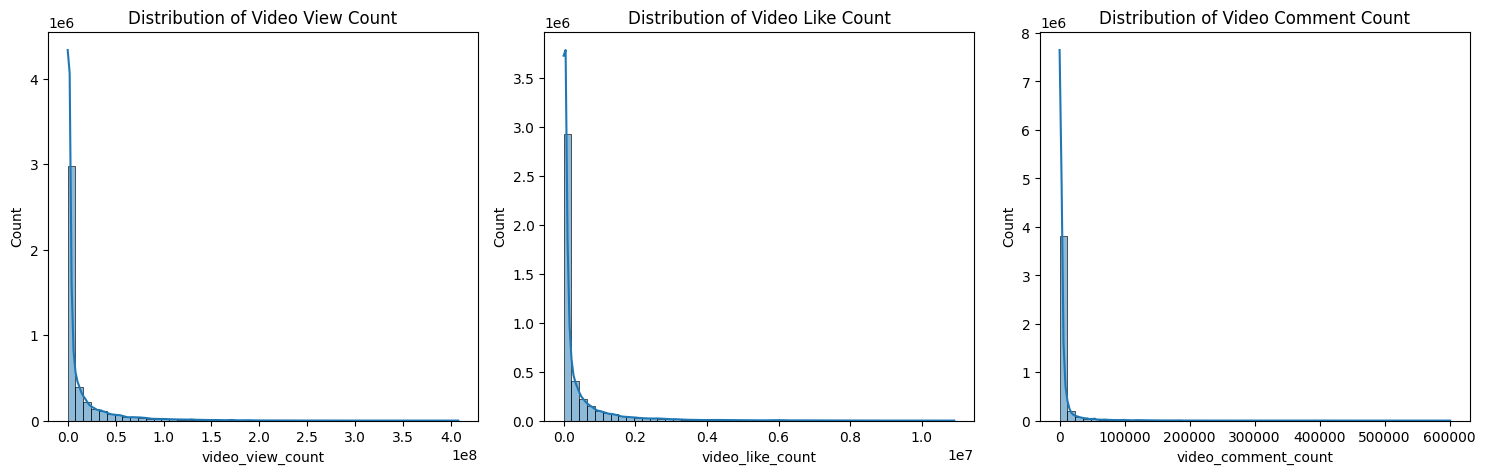

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['video_view_count'], bins=50, kde=True)
plt.title('Distribution of Video View Count')

plt.subplot(1, 3, 2)
sns.histplot(df['video_like_count'], bins=50, kde=True)
plt.title('Distribution of Video Like Count')

plt.subplot(1, 3, 3)
sns.histplot(df['video_comment_count'], bins=50, kde=True)
plt.title('Distribution of Video Comment Count')

plt.tight_layout()
plt.show()

## BOXPLOT
Create box plots for the numerical columns to visualize their distributions and identify potential outliers.



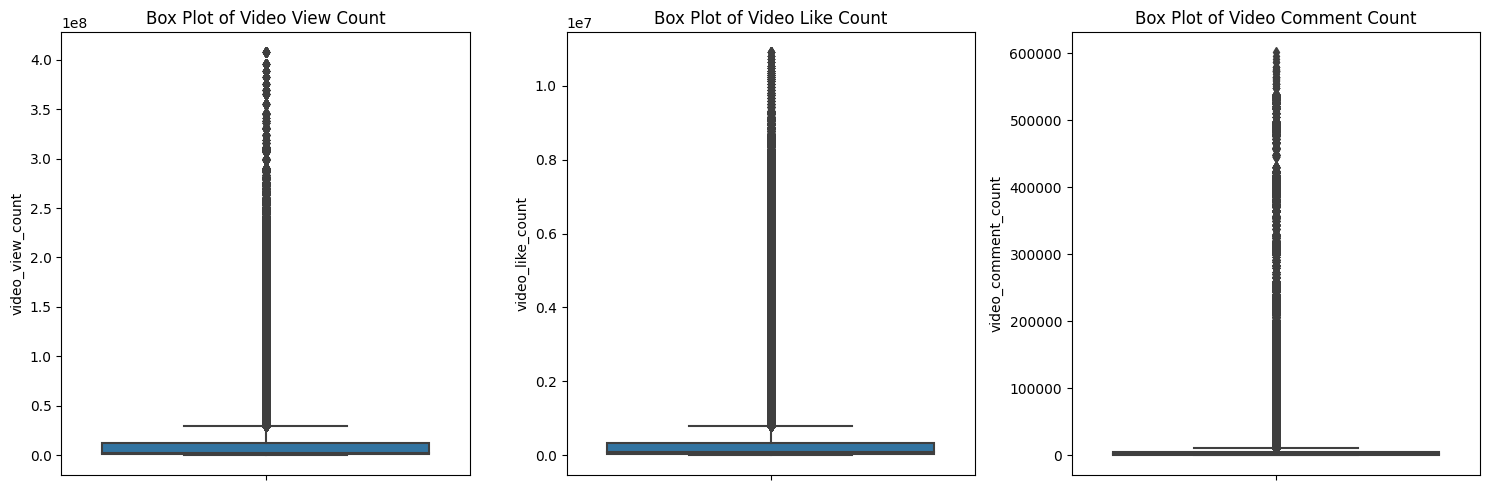

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['video_view_count'])
plt.title('Box Plot of Video View Count')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['video_like_count'])
plt.title('Box Plot of Video Like Count')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['video_comment_count'])
plt.title('Box Plot of Video Comment Count')

plt.tight_layout()
plt.show()

## Count Plots
**Reasoning**:
Create count plots for the categorical columns to visualize the frequency of each category and country.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52489 (\N{HANGUL SYLLABLE COG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


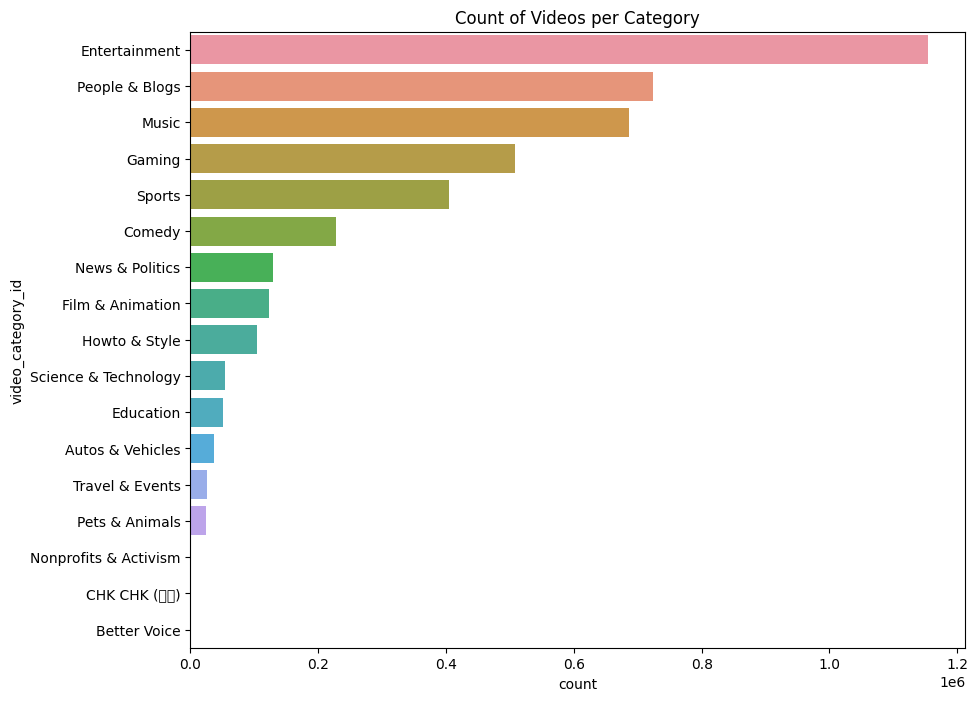

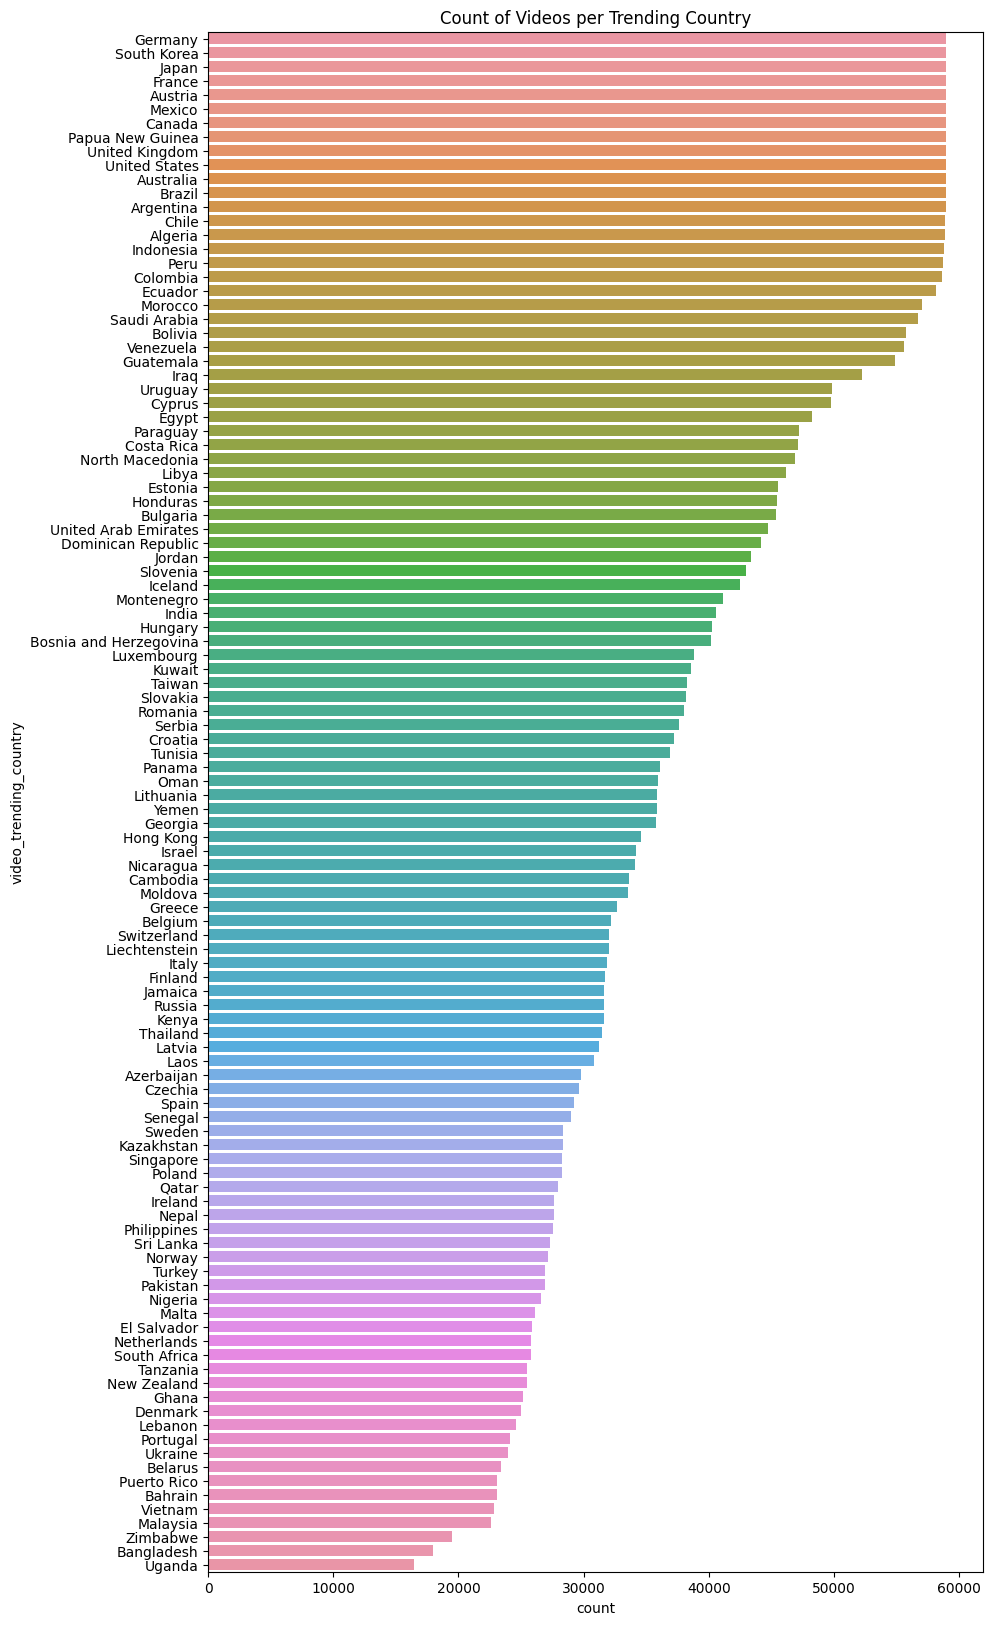

In [11]:
plt.figure(figsize=(10, 8))
sns.countplot(y='video_category_id', data=df, order=df['video_category_id'].value_counts().index)
plt.title('Count of Videos per Category')
plt.show()

plt.figure(figsize=(10, 20))
sns.countplot(y='video_trending_country', data=df, order=df['video_trending_country'].value_counts().index)
plt.title('Count of Videos per Trending Country')
plt.show()

## Analyze relationships

### Subtask:
Explore the relationships between different variables. For example, how do view counts relate to like counts or comment counts? Are there certain categories or countries that have higher engagement?


### Scatter Plot
**Reasoning**:
Create scatter plots with log scales for the numerical variables to visualize their relationships, as the distributions are highly skewed.

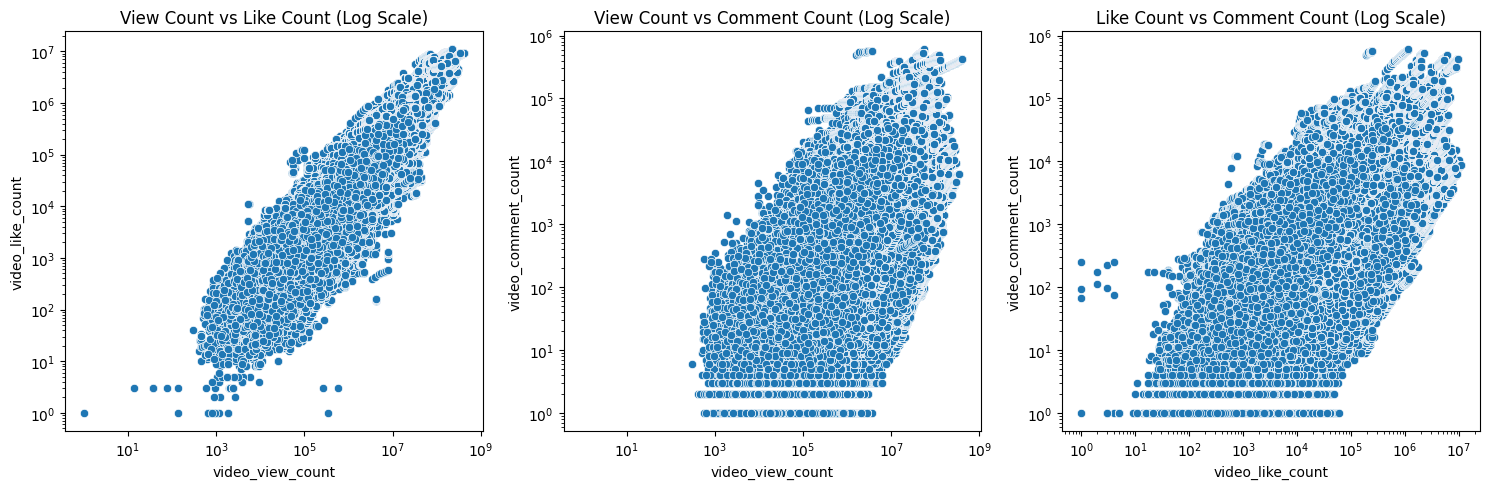

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='video_view_count', y='video_like_count')
plt.xscale('log')
plt.yscale('log')
plt.title('View Count vs Like Count (Log Scale)')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='video_view_count', y='video_comment_count')
plt.xscale('log')
plt.yscale('log')
plt.title('View Count vs Comment Count (Log Scale)')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='video_like_count', y='video_comment_count')
plt.xscale('log')
plt.yscale('log')
plt.title('Like Count vs Comment Count (Log Scale)')

plt.tight_layout()
plt.show()

## Heatmap
**Reasoning**:
Calculate and display the correlation matrix for the numerical variables and visualize it using a heatmap.

Correlation Matrix:


,video_view_count,video_like_count,video_comment_count
video_view_count,1.000000,0.885036,0.248748
video_like_count,0.885036,1.000000,0.378675
video_comment_count,0.248748,0.378675,1.000000


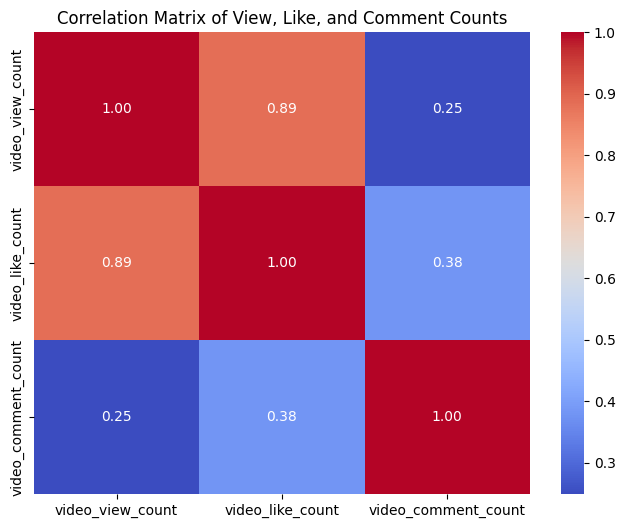

In [13]:
correlation_matrix = df[['video_view_count', 'video_like_count', 'video_comment_count']].corr()
print("Correlation Matrix:")
display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of View, Like, and Comment Counts')
plt.show()

**Reasoning**:
Group the data by video category and calculate the average view, like, and comment counts to explore engagement across categories.

In [14]:
category_engagement = df.groupby('video_category_id')[['video_view_count', 'video_like_count', 'video_comment_count']].mean().reset_index()
print("Average View, Like, and Comment Counts per Video Category:")
display(category_engagement.sort_values(by='video_view_count', ascending=False))

Average View, Like, and Comment Counts per Video Category:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,video_category_id,video_view_count,video_like_count,video_comment_count
13,Pets & Animals,2.802573e+07,616424.552818,2162.197288
8,Howto & Style,2.567188e+07,428969.501508,2111.335977
14,Science & Technology,2.073768e+07,741590.160479,4169.403187
12,People & Blogs,1.942653e+07,452320.301121,4334.660684
5,Entertainment,1.762836e+07,542559.391025,6225.220491
3,Comedy,1.744205e+07,472891.025768,3129.762730
16,Travel & Events,1.561682e+07,641871.869620,4582.836465
15,Sports,1.093367e+07,337800.512386,5169.977009
6,Film & Animation,7.879708e+06,293780.579704,10990.195490
9,Music,7.755583e+06,262927.997573,15221.377785


**Reasoning**:
Group the data by trending country and calculate the average view, like, and comment counts to explore engagement across countries.


In [15]:
country_engagement = df.groupby('video_trending_country')[['video_view_count', 'video_like_count', 'video_comment_count']].mean().reset_index()
print("Average View, Like, and Comment Counts per Trending Country:")
display(country_engagement.sort_values(by='video_view_count', ascending=False))

Average View, Like, and Comment Counts per Trending Country:


,video_trending_country,video_view_count,video_like_count,video_comment_count
6,Bangladesh,3.918498e+07,8.346768e+05,2998.904051
57,Malaysia,3.764257e+07,9.988762e+05,5647.173689
100,Uganda,3.582151e+07,8.797887e+05,4130.194190
25,El Salvador,3.556764e+07,1.013413e+06,6153.082372
63,Nepal,3.300869e+07,8.469740e+05,3155.759476
...,...,...,...,...
82,Russia,2.119486e+06,7.569798e+04,1927.493342
30,Germany,2.082869e+06,7.762610e+04,5208.371344
28,France,1.894118e+06,7.715208e+04,4093.533114
11,Brazil,1.840347e+06,7.094605e+04,4243.133876


**Reasoning**:
Visualize the average engagement metrics across different video categories and trending countries using bar plots, focusing on the top categories and countries for better readability.


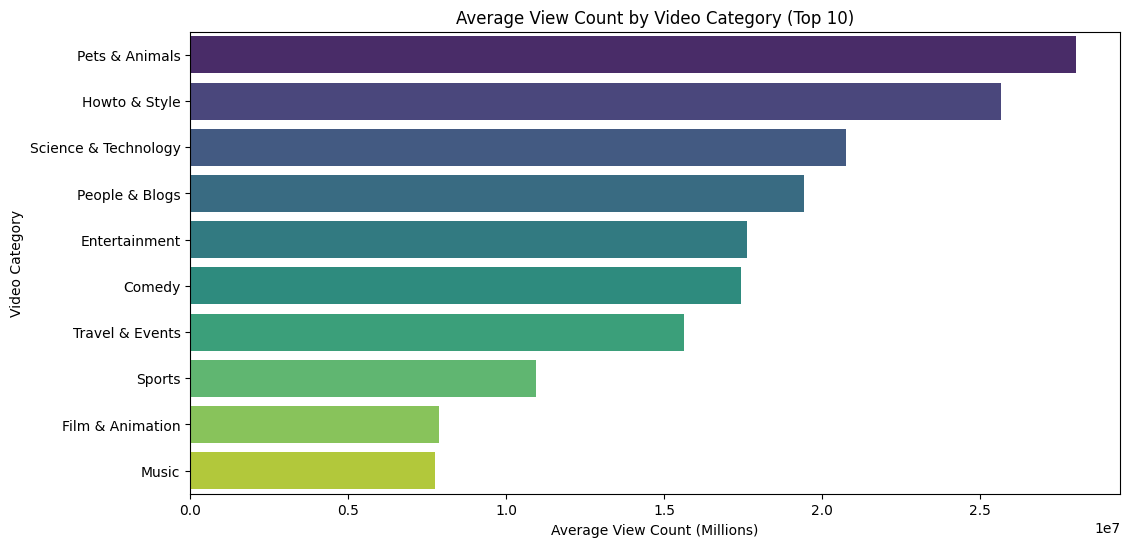

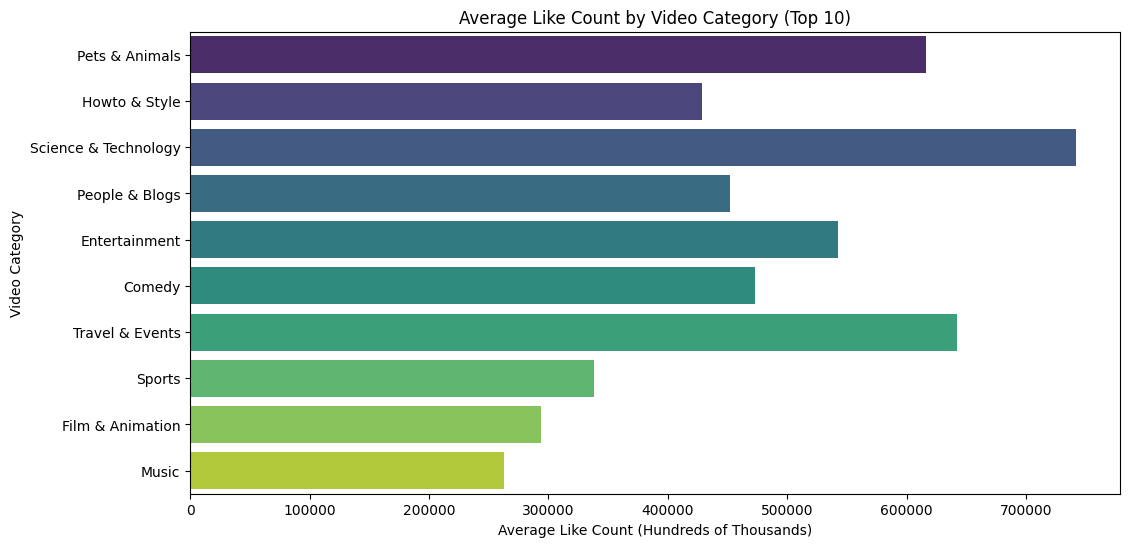

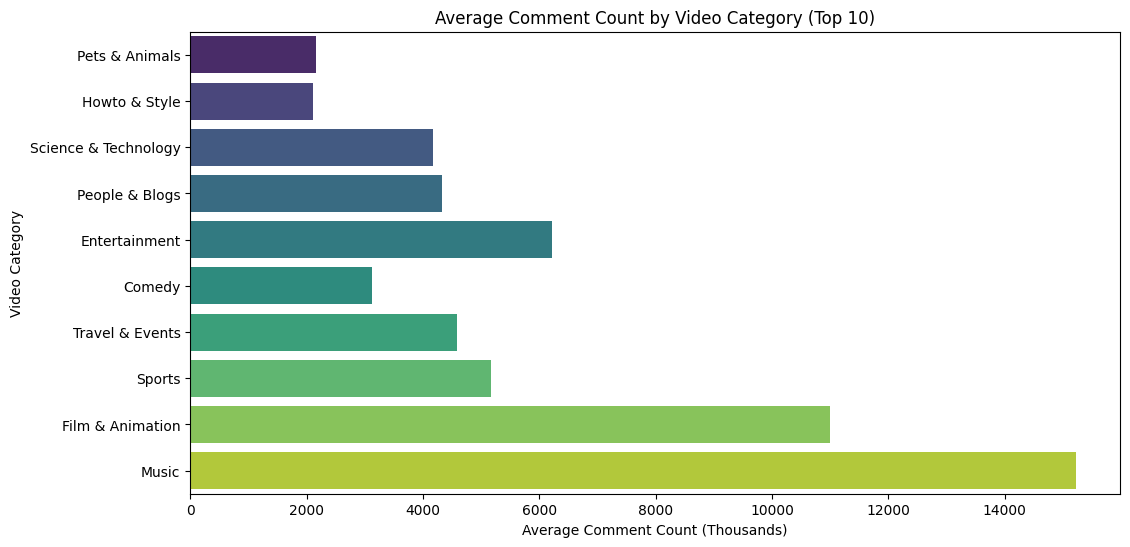

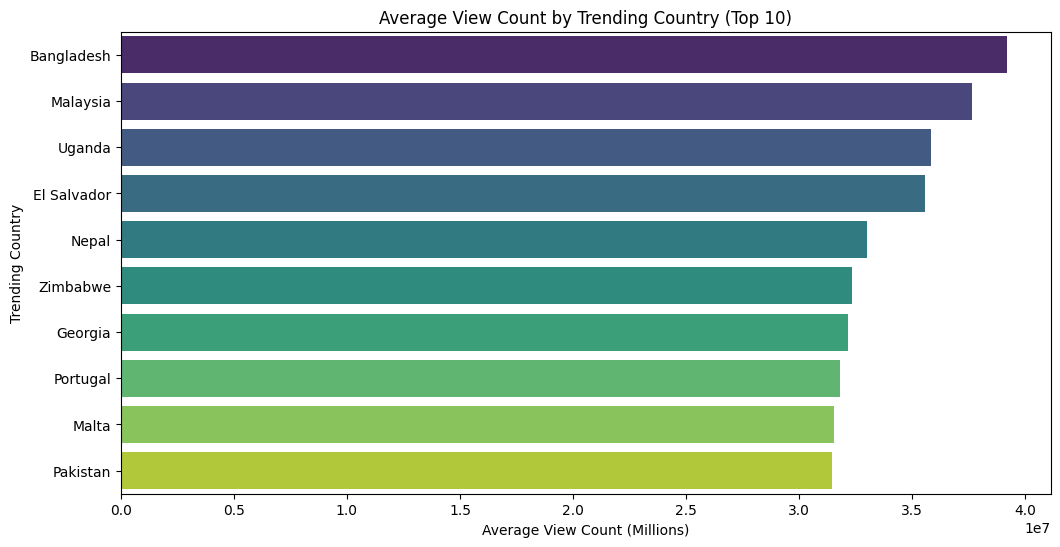

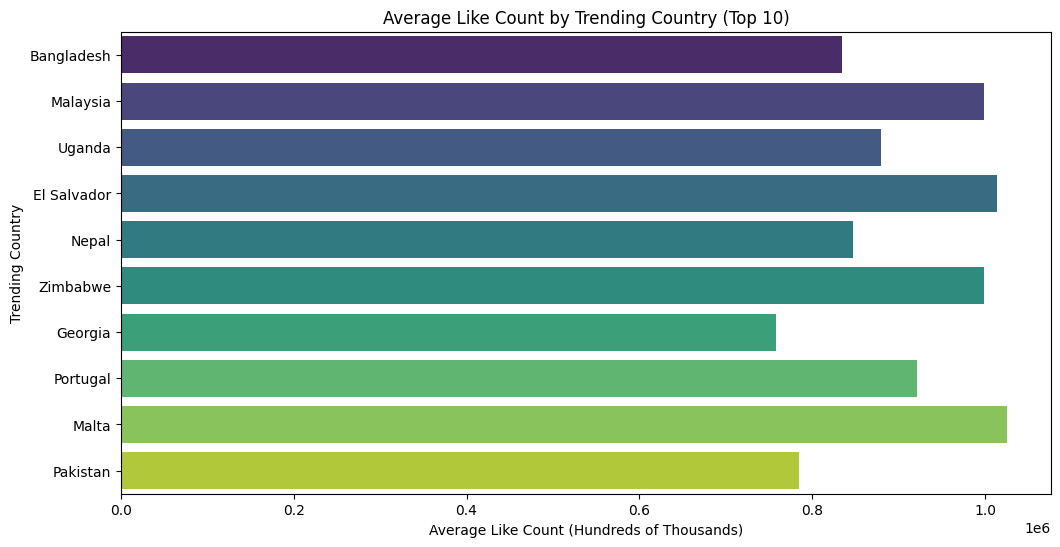

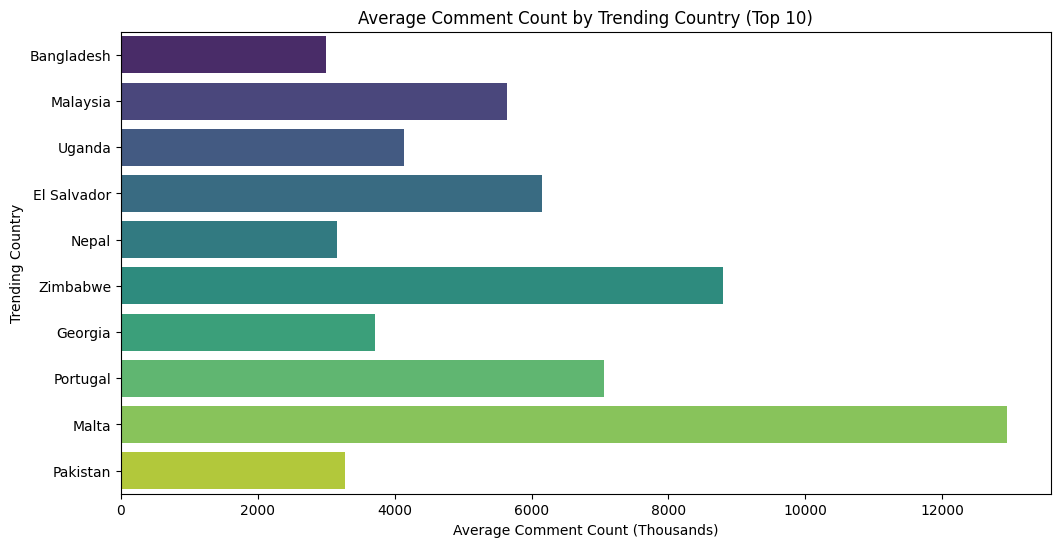

In [16]:
# Select top N categories for visualization
top_n_categories = category_engagement.sort_values(by='video_view_count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_categories, x='video_view_count', y='video_category_id', palette='viridis')
plt.title('Average View Count by Video Category (Top 10)')
plt.xlabel('Average View Count (Millions)')
plt.ylabel('Video Category')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_categories, x='video_like_count', y='video_category_id', palette='viridis')
plt.title('Average Like Count by Video Category (Top 10)')
plt.xlabel('Average Like Count (Hundreds of Thousands)')
plt.ylabel('Video Category')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_categories, x='video_comment_count', y='video_category_id', palette='viridis')
plt.title('Average Comment Count by Video Category (Top 10)')
plt.xlabel('Average Comment Count (Thousands)')
plt.ylabel('Video Category')
plt.show()

# Select top N countries for visualization
top_n_countries = country_engagement.sort_values(by='video_view_count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_countries, x='video_view_count', y='video_trending_country', palette='viridis')
plt.title('Average View Count by Trending Country (Top 10)')
plt.xlabel('Average View Count (Millions)')
plt.ylabel('Trending Country')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_countries, x='video_like_count', y='video_trending_country', palette='viridis')
plt.title('Average Like Count by Trending Country (Top 10)')
plt.xlabel('Average Like Count (Hundreds of Thousands)')
plt.ylabel('Trending Country')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_countries, x='video_comment_count', y='video_trending_country', palette='viridis')
plt.title('Average Comment Count by Trending Country (Top 10)')
plt.xlabel('Average Comment Count (Thousands)')
plt.ylabel('Trending Country')
plt.show()

## Identify trending patterns

### Subtask:
Investigate if there are any patterns in trending videos based on categories, countries, or other factors.

In [17]:
print("Top 10 Video Categories by Average View Count:")
display(category_engagement.sort_values(by='video_view_count', ascending=False).head(10))

print("\nTop 10 Video Categories by Average Like Count:")
display(category_engagement.sort_values(by='video_like_count', ascending=False).head(10))

print("\nTop 10 Video Categories by Average Comment Count:")
display(category_engagement.sort_values(by='video_comment_count', ascending=False).head(10))

print("\nTop 10 Trending Countries by Average View Count:")
display(country_engagement.sort_values(by='video_view_count', ascending=False).head(10))

print("\nTop 10 Trending Countries by Average Like Count:")
display(country_engagement.sort_values(by='video_like_count', ascending=False).head(10))

print("\nTop 10 Trending Countries by Average Comment Count:")
display(country_engagement.sort_values(by='video_comment_count', ascending=False).head(10))

print("\nSummary of Trending Patterns:")
print("Based on average engagement metrics:")
print("- Categories like 'Pets & Animals', 'Howto & Style', and 'Science & Technology' tend to have high average view and like counts.")
print("- The 'Music' category stands out with the highest average comment count, despite not being at the very top for views and likes.")
print("- Countries like Bangladesh, Malaysia, and Uganda consistently appear in the top rankings for average view and like counts.")
print("- Some countries show higher average comment counts relative to their view/like counts, indicating potential regional differences in audience interaction.")

Top 10 Video Categories by Average View Count:


,video_category_id,video_view_count,video_like_count,video_comment_count
13,Pets & Animals,2.802573e+07,616424.552818,2162.197288
8,Howto & Style,2.567188e+07,428969.501508,2111.335977
14,Science & Technology,2.073768e+07,741590.160479,4169.403187
12,People & Blogs,1.942653e+07,452320.301121,4334.660684
5,Entertainment,1.762836e+07,542559.391025,6225.220491
3,Comedy,1.744205e+07,472891.025768,3129.762730
16,Travel & Events,1.561682e+07,641871.869620,4582.836465
15,Sports,1.093367e+07,337800.512386,5169.977009
6,Film & Animation,7.879708e+06,293780.579704,10990.195490
9,Music,7.755583e+06,262927.997573,15221.377785



Top 10 Video Categories by Average Like Count:


,video_category_id,video_view_count,video_like_count,video_comment_count
14,Science & Technology,2.073768e+07,741590.160479,4169.403187
16,Travel & Events,1.561682e+07,641871.869620,4582.836465
13,Pets & Animals,2.802573e+07,616424.552818,2162.197288
5,Entertainment,1.762836e+07,542559.391025,6225.220491
3,Comedy,1.744205e+07,472891.025768,3129.762730
12,People & Blogs,1.942653e+07,452320.301121,4334.660684
8,Howto & Style,2.567188e+07,428969.501508,2111.335977
15,Sports,1.093367e+07,337800.512386,5169.977009
6,Film & Animation,7.879708e+06,293780.579704,10990.195490
9,Music,7.755583e+06,262927.997573,15221.377785



Top 10 Video Categories by Average Comment Count:


,video_category_id,video_view_count,video_like_count,video_comment_count
9,Music,7.755583e+06,262927.997573,15221.377785
11,Nonprofits & Activism,2.145916e+06,87689.416667,12130.750000
6,Film & Animation,7.879708e+06,293780.579704,10990.195490
7,Gaming,5.193994e+06,186299.744465,7487.886904
5,Entertainment,1.762836e+07,542559.391025,6225.220491
15,Sports,1.093367e+07,337800.512386,5169.977009
4,Education,6.677503e+06,184167.533693,4829.290677
16,Travel & Events,1.561682e+07,641871.869620,4582.836465
12,People & Blogs,1.942653e+07,452320.301121,4334.660684
14,Science & Technology,2.073768e+07,741590.160479,4169.403187



Top 10 Trending Countries by Average View Count:


,video_trending_country,video_view_count,video_like_count,video_comment_count
6,Bangladesh,3.918498e+07,8.346768e+05,2998.904051
57,Malaysia,3.764257e+07,9.988762e+05,5647.173689
100,Uganda,3.582151e+07,8.797887e+05,4130.194190
25,El Salvador,3.556764e+07,1.013413e+06,6153.082372
63,Nepal,3.300869e+07,8.469740e+05,3155.759476
109,Zimbabwe,3.236046e+07,9.990244e+05,8801.246328
29,Georgia,3.215935e+07,7.580863e+05,3719.567312
78,Portugal,3.182285e+07,9.212905e+05,7054.465706
58,Malta,3.153002e+07,1.025003e+06,12941.508740
71,Pakistan,3.147502e+07,7.842030e+05,3273.027122



Top 10 Trending Countries by Average Like Count:


,video_trending_country,video_view_count,video_like_count,video_comment_count
58,Malta,3.153002e+07,1.025003e+06,12941.508740
25,El Salvador,3.556764e+07,1.013413e+06,6153.082372
109,Zimbabwe,3.236046e+07,9.990244e+05,8801.246328
57,Malaysia,3.764257e+07,9.988762e+05,5647.173689
69,Norway,2.728448e+07,9.510221e+05,9643.678745
65,New Zealand,2.633136e+07,9.471635e+05,11046.137602
78,Portugal,3.182285e+07,9.212905e+05,7054.465706
21,Denmark,2.645761e+07,8.968771e+05,8509.615243
89,South Africa,3.053915e+07,8.952994e+05,5243.715366
100,Uganda,3.582151e+07,8.797887e+05,4130.194190



Top 10 Trending Countries by Average Comment Count:


,video_trending_country,video_view_count,video_like_count,video_comment_count
79,Puerto Rico,1.106806e+07,387894.185522,22154.904371
66,Nicaragua,8.523580e+06,285674.416418,16236.514490
5,Bahrain,8.600306e+06,286511.148531,16086.895014
72,Panama,8.198093e+06,283132.832665,15994.237675
80,Qatar,8.162704e+06,267969.812199,15838.796519
52,Lebanon,7.398196e+06,256939.319454,14400.462604
22,Dominican Republic,7.149283e+06,244024.323848,14040.171423
74,Paraguay,6.899695e+06,236822.294248,13467.525499
17,Costa Rica,6.962625e+06,237105.898927,13411.906773
34,Honduras,7.263619e+06,236888.683289,13307.718387



Summary of Trending Patterns:
Based on average engagement metrics:
- Categories like 'Pets & Animals', 'Howto & Style', and 'Science & Technology' tend to have high average view and like counts.
- The 'Music' category stands out with the highest average comment count, despite not being at the very top for views and likes.
- Countries like Bangladesh, Malaysia, and Uganda consistently appear in the top rankings for average view and like counts.
- Some countries show higher average comment counts relative to their view/like counts, indicating potential regional differences in audience interaction.


# Feature Engineering

## Handle Missing Values 

In [18]:
df.isnull().sum()

video_title                     0
video_tags                1392089
video_category_id            2408
video_trending_country          3
video_view_count              580
video_like_count            47536
video_comment_count         26035
dtype: int64

### Numerical Values
Filling Numerical Values with median because data is extremely right Skewed

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


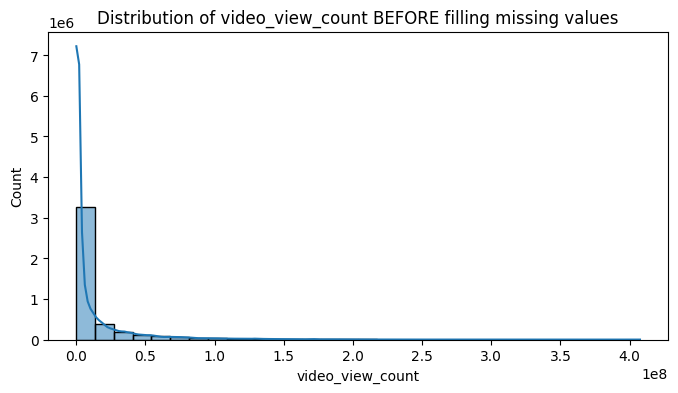

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


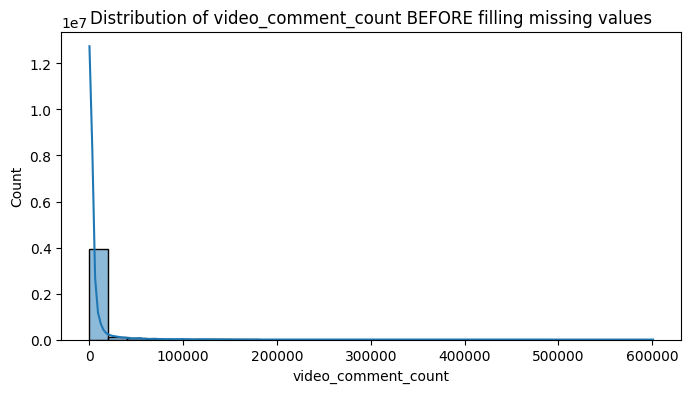

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


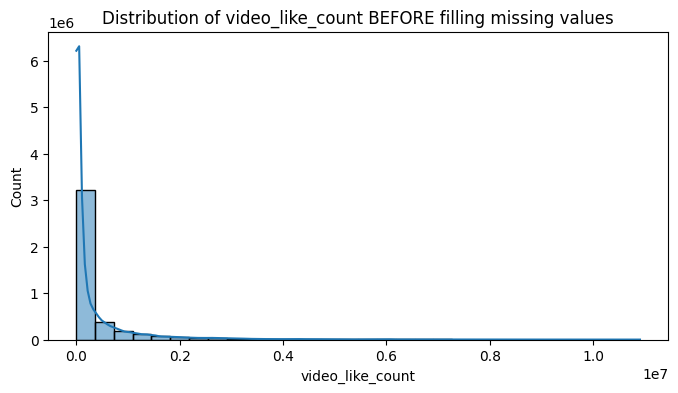

/tmp/ipykernel_13/618201758.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(median_value)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


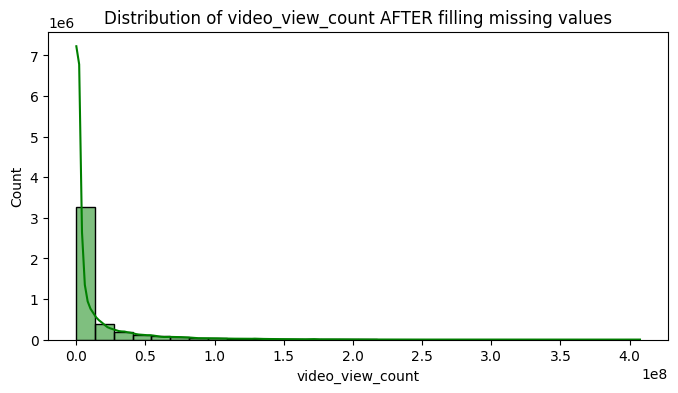

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


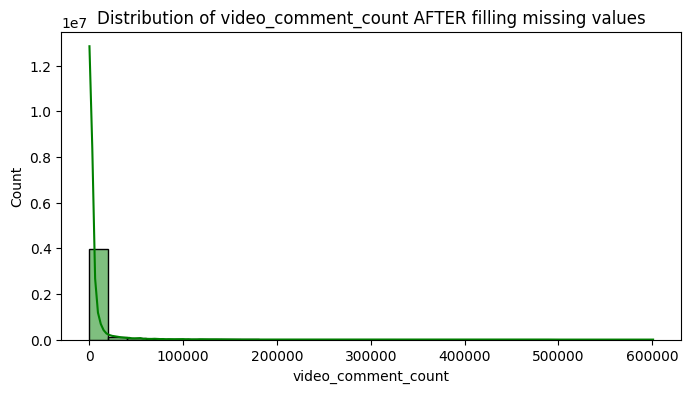

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


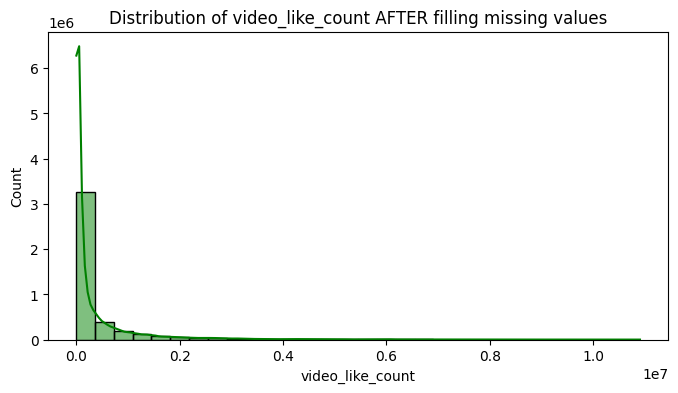

In [19]:
missing_numeric_cols = ['video_view_count','video_comment_count','video_like_count']

# Plot distributions before filling
for col in missing_numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col} BEFORE filling missing values')
    plt.show()

# Fill missing values with median
for col in missing_numeric_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Plot distributions after filling
for col in missing_numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='green')
    plt.title(f'Distribution of {col} AFTER filling missing values')
    plt.show()


### Handle Missing 'Video_tags'

In [20]:
# Fill missing values in video_tags with a placeholder
df['video_tags'] = df['video_tags'].fillna('no_tags')

# Verify that there are no more missing values in 'video_tags'
print("\nMissing values per column after filling 'video_tags':")
display(df.isnull().sum())

/tmp/ipykernel_13/1792989499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['video_tags'] = df['video_tags'].fillna('no_tags')



Missing values per column after filling 'video_tags':


video_title                  0
video_tags                   0
video_category_id         2408
video_trending_country       3
video_view_count             0
video_like_count             0
video_comment_count          0
dtype: int64

### Handle Missing Video_Trending_Country

As there are only 3 rows with missing 'video-trending-country' sowe can drop them

In [21]:
df = df.dropna(subset=['video_trending_country'])

In [22]:
df.sample(10)

,video_title,video_tags,video_category_id,video_trending_country,video_view_count,video_like_count,video_comment_count
565308,ركلات ترجيح مباراة الأهلي والزمالك 6/7 المارد ...,ركلات ترجيح الأهلي والزمالك 0/0 المارد الأحمر ...,Sports,Libya,1086208.0,14772.0,713.0
3055415,Emanero - Mala mujer (Official video),emanero,Music,Uruguay,694930.0,19680.0,1157.0
3380242,When you use 100% of your brain 😂,no_tags,Comedy,Uganda,40494620.0,1499522.0,6716.0
3261260,Jala Brat & Buba Corelli & Gims - Don Diego (RMX),no_tags,Music,Serbia,4407412.0,39145.0,1191.0
1068026,Christmas Balls with Creative Art Techniques! ...,no_tags,Entertainment,Israel,12059505.0,271784.0,321.0
1369080,Une nouvelle voiture pour Noël 🥹,no_tags,Comedy,North Macedonia,35467609.0,787360.0,1133.0
3772112,I Pranked The School Bully.. 🫣📚 (Candy Prank A...,no_tags,Entertainment,Cyprus,63437661.0,1168909.0,3111.0
725179,I Built a SECRET Soccer Field in My Room,"The Royalty Family,Royalty Family,Andrea Espad...",People & Blogs,Austria,5156227.0,66340.0,40232.0
3215829,Why is Everything So Boring Now?,"kurtis conner,kurtis connor",Comedy,Iceland,3143180.0,182226.0,15739.0
1945643,Full Highlights | Pakistan vs New Zealand | 1s...,"Pakistan Cricket Board,Cricket Pakistan,Pakist...",Sports,Pakistan,1773894.0,29618.0,1056.0


### Handle Missing 'Video_Category_ID'

In [23]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copy the DataFrame to avoid modifying original
df_copy = df.copy()

# Encode category column into numbers (if not already integers)
le = LabelEncoder()

# Convert to string first to safely encode even if there are NaNs
df_copy['video_category_id'] = df_copy['video_category_id'].astype(str)
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# Copy the DataFrame
df_copy = df.copy()

# Encode category column (skip NaNs)
le = LabelEncoder()
non_null = df_copy['video_category_id'].notna()
df_copy.loc[non_null, 'video_category_id'] = le.fit_transform(df_copy.loc[non_null, 'video_category_id'])

# Convert to float (required for KNNImputer)
df_copy['video_category_id'] = pd.to_numeric(df_copy['video_category_id'], errors='coerce')

# Apply KNN Imputer
df_copy[['video_category_id']] = KNNImputer(n_neighbors=5).fit_transform(df_copy[['video_category_id']])

# Round and inverse transform
df_copy['video_category_id'] = le.inverse_transform(df_copy['video_category_id'].round().astype(int))

# Assign back
df['video_category_id'] = df_copy['video_category_id']


In [24]:
df.sample(10)

,video_title,video_tags,video_category_id,video_trending_country,video_view_count,video_like_count,video_comment_count
2853360,2 LIPS tutorial👄😄,no_tags,People & Blogs,Kazakhstan,52231903.0,696634.0,1490.0
2696260,"Este asiento de avión cuesta $13,000 dólares: ...","luisitocomunica,luisitocomunicaa,luisito comun...",Entertainment,Costa Rica,8792242.0,187801.0,3435.0
516587,Chiedere ai Milionari di Fare la Cacca a Casa ...,"the show,theshow,the show is you,theshowisyou,...",Entertainment,Italy,273278.0,20568.0,414.0
2196448,Вывели рыбку из депрессии,no_tags,News & Politics,Russia,1861441.0,99696.0,606.0
3007937,Dad has to use tweezers to remove a pony bead ...,"dad,daughter,kids,nose,nostril,pony bead,remov...",Entertainment,Jamaica,35993064.0,335610.0,321.0
3746205,تحدي جاوب غلط | ندمنا 😭💦,"banen,banen stars,banenxstars,banien stars,ban...",Entertainment,Jordan,4481647.0,151742.0,5339.0
4122720,한번에 두명을 열받게하는 초성퀴즈 대참사,"하우카우,하우카우 우우우,HOWCOW,howcow,HOWCOW uuu,howcow ...",Gaming,South Korea,42290.0,1172.0,117.0
2442816,LEMONADE MAGIC PRANK,no_tags,Entertainment,Laos,38932431.0,803785.0,428.0
2418429,Ingenious Method for Upgrade Pruning Shears fo...,no_tags,Howto & Style,Ukraine,33741837.0,412465.0,809.0
3876026,这也太厉害了 #火影忍者 #joker#cosplay,"佐助与鸣人,火影忍者,鸣人,小樱,卡卡西,佐助,斗罗大陆,唐舞桐,小舞,唐三,兄弟搞怪,日常...",Comedy,Georgia,75857657.0,909835.0,495.0


## Applying Log Transform

Applying Log Transform on numerical columns to reduce skewness.
(Applying Log Transform because data is highly right skewed). 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


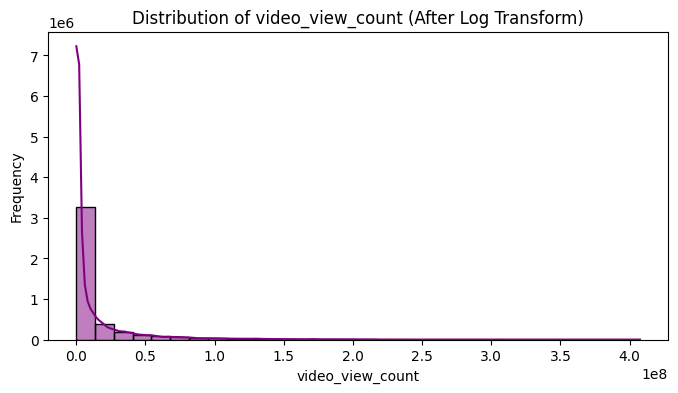

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


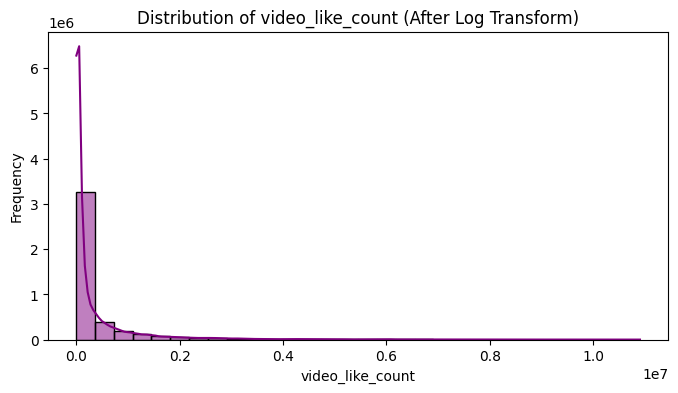

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


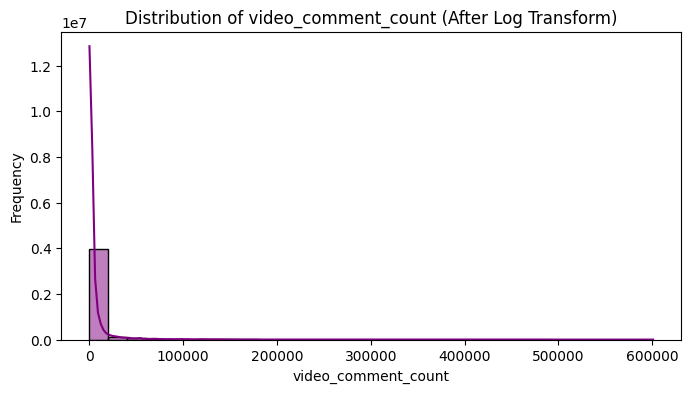

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


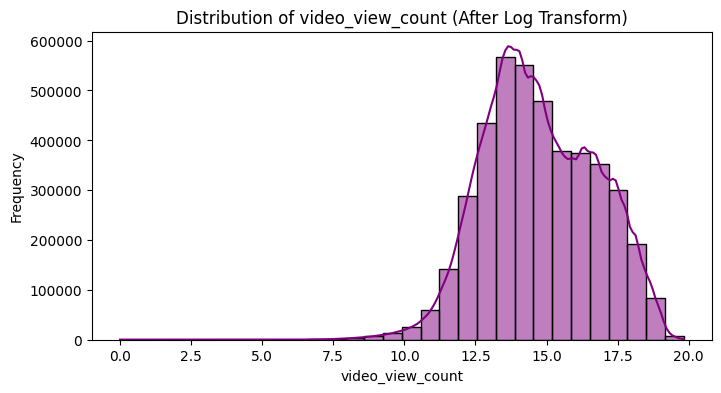

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


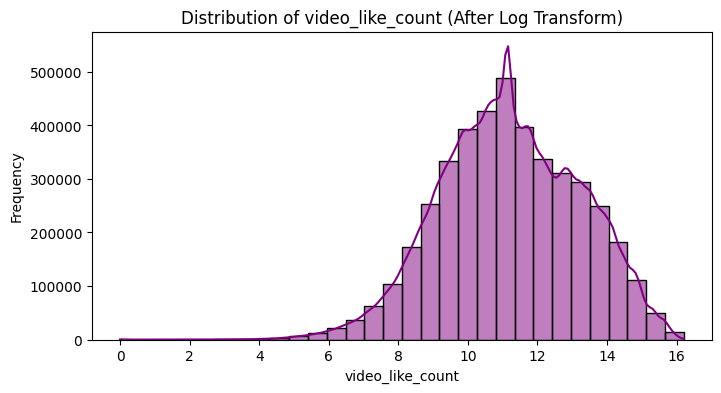

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


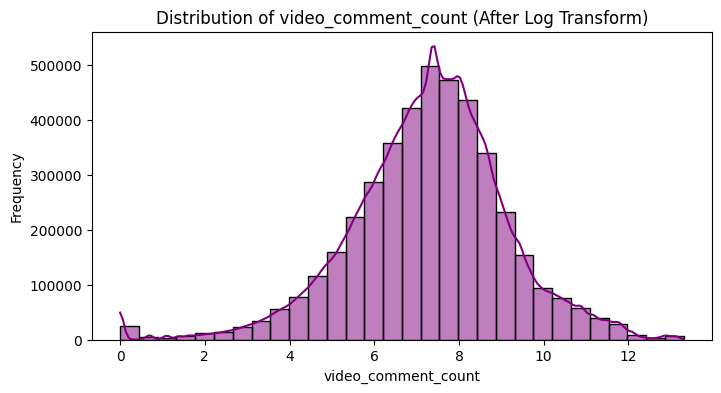

In [25]:
log_columns = ['video_view_count', 'video_like_count', 'video_comment_count']
for col in log_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='purple')
    plt.title(f'Distribution of {col} (After Log Transform)')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
#Apply log1p transform (log(1 + x)) to handle 0 values
df['video_view_count'] = np.log1p(df['video_view_count'])
df['video_like_count'] = np.log1p(df['video_like_count'])
df['video_comment_count'] = np.log1p(df['video_comment_count'])

# Plot distributions AFTER log transformation
log_columns = ['video_view_count', 'video_like_count', 'video_comment_count']

for col in log_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='purple')
    plt.title(f'Distribution of {col} (After Log Transform)')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Handling Outliers

Applying Winsorization technique to handle outliers of Numerical values


In [26]:
from scipy.stats.mstats import winsorize
log_cols=['video_view_count','video_comment_count','video_like_count']
for col in log_cols:
    df[col] = winsorize(df[col], limits=[0.02, 0.02])


BoxPlot to check if outliers are handled properly

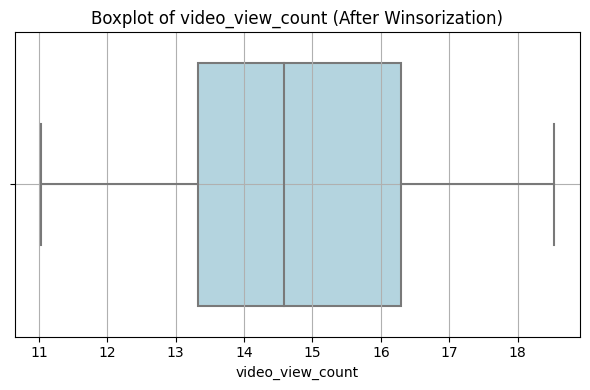

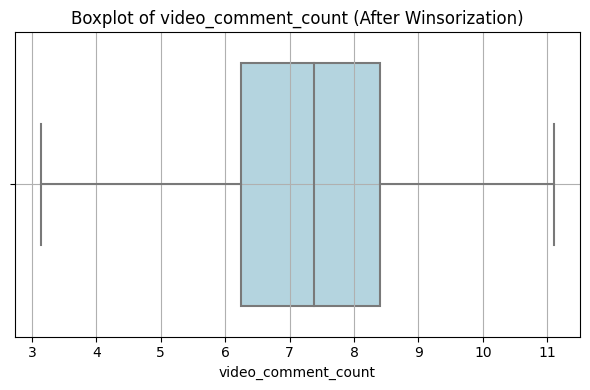

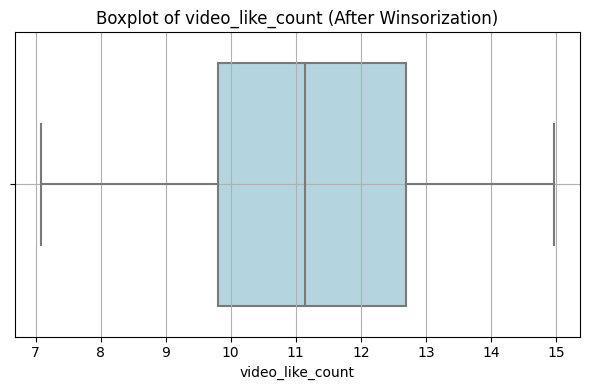

In [27]:
for col in log_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col} (After Winsorization)')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Encoding of Categorical Column

Applying one-hot-encoding on video_category_id

In [28]:
from sklearn.preprocessing import OneHotEncoder

# Step 1: Select the column
cat_col = df[['video_category_id']]  # Must be 2D for OneHotEncoder

# Step 2: Initialize encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Step 3: Fit and transform
encoded_array = encoder.fit_transform(cat_col)

# Step 4: Create new DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['video_category_id']))

# Step 5: Join with original DataFrame (drop the original column)
df = df.drop('video_category_id', axis=1).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

df.head()

,video_title,video_tags,video_trending_country,video_view_count,video_like_count,video_comment_count,video_category_id_Autos & Vehicles,video_category_id_Better Voice,video_category_id_Comedy,video_category_id_Education,...,video_category_id_Gaming,video_category_id_Howto & Style,video_category_id_Music,video_category_id_News & Politics,video_category_id_Nonprofits & Activism,video_category_id_People & Blogs,video_category_id_Pets & Animals,video_category_id_Science & Technology,video_category_id_Sports,video_category_id_Travel & Events
0,JENNIE - Mantra (Official Music Video),"JENNIE,Mantra,제니,Jennie Mantra,Jennie from Bla...",United Arab Emirates,16.837653,14.529566,11.108710,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHILE vs. BRASIL [1-2] | RESUMEN | ELIMINATORI...,"fútbol,pelota,gol,copa,libertadores,sudamerica...",United Arab Emirates,15.193279,11.141383,7.843849,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,تحدي الحقيبة مع ابو عبير 🔥 | سلسلتنا #2,"تشكيله,فيفا,فيفا20,التمت,درافت,زلاتان,ام,جي,مل...",United Arab Emirates,13.656712,11.524419,9.263123,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,VENEZUELA vs. ARGENTINA [1-1] | RESUMEN | ELIM...,"fútbol,pelota,gol,copa,libertadores,sudamerica...",United Arab Emirates,15.139586,11.141383,8.044305,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Bougainvillea Trailer | October 17 | Jyothirma...,no_tags,United Arab Emirates,14.363742,11.120224,7.962067,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Scaling

*Applying Standard Scaling on Numerical Columns*

In [29]:
from sklearn.preprocessing import StandardScaler

# Columns to scale (use winsorized versions)
log_cols = ['video_view_count', 'video_like_count', 'video_comment_count']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform, and update the original DataFrame columns directly
df[log_cols] = scaler.fit_transform(df[log_cols])
df[log_cols].head()


,video_view_count,video_like_count,video_comment_count
0,1.080431,1.714546,2.223304
1,0.222285,-0.032483,0.314592
2,-0.579600,0.165019,1.144332
3,0.194264,-0.032483,0.431784
4,-0.210624,-0.043394,0.383706


In [30]:
df.head()

,video_title,video_tags,video_trending_country,video_view_count,video_like_count,video_comment_count,video_category_id_Autos & Vehicles,video_category_id_Better Voice,video_category_id_Comedy,video_category_id_Education,...,video_category_id_Gaming,video_category_id_Howto & Style,video_category_id_Music,video_category_id_News & Politics,video_category_id_Nonprofits & Activism,video_category_id_People & Blogs,video_category_id_Pets & Animals,video_category_id_Science & Technology,video_category_id_Sports,video_category_id_Travel & Events
0,JENNIE - Mantra (Official Music Video),"JENNIE,Mantra,제니,Jennie Mantra,Jennie from Bla...",United Arab Emirates,1.080431,1.714546,2.223304,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHILE vs. BRASIL [1-2] | RESUMEN | ELIMINATORI...,"fútbol,pelota,gol,copa,libertadores,sudamerica...",United Arab Emirates,0.222285,-0.032483,0.314592,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,تحدي الحقيبة مع ابو عبير 🔥 | سلسلتنا #2,"تشكيله,فيفا,فيفا20,التمت,درافت,زلاتان,ام,جي,مل...",United Arab Emirates,-0.579600,0.165019,1.144332,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,VENEZUELA vs. ARGENTINA [1-1] | RESUMEN | ELIM...,"fútbol,pelota,gol,copa,libertadores,sudamerica...",United Arab Emirates,0.194264,-0.032483,0.431784,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Bougainvillea Trailer | October 17 | Jyothirma...,no_tags,United Arab Emirates,-0.210624,-0.043394,0.383706,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### *TFIDF Vectorization for video_tags*  

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
# --- TF-IDF for video_tags ---
tfidf_tags = TfidfVectorizer(max_features=500, stop_words='english')
tags_tfidf_matrix = tfidf_tags.fit_transform(df['video_tags'])


### *TFIDF Vectorization for video_title*

In [32]:
# --- TF-IDF for video_title ---
tfidf_title = TfidfVectorizer(max_features=500, stop_words='english')
title_tfidf_matrix = tfidf_title.fit_transform(df['video_title'])

*### Frequency Encoding for video_trending_country*

In [33]:

country_freq = df['video_trending_country'].value_counts()
df['video_trending_country_enc'] = df['video_trending_country'].map(country_freq)